## Selection

First, 

In [ ]:
setwd("..")
train <- read.csv("data/training.csv")
test <- read.csv("data/test.csv")

Warning message:
`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 


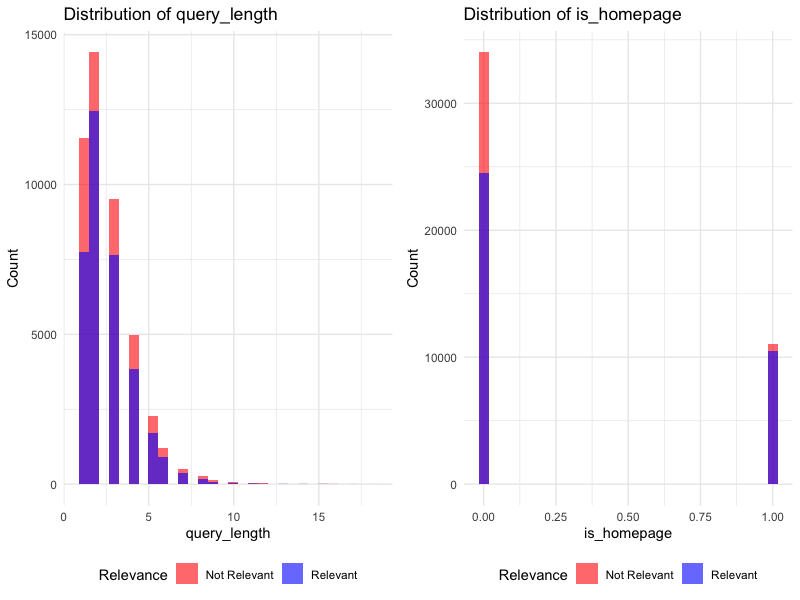

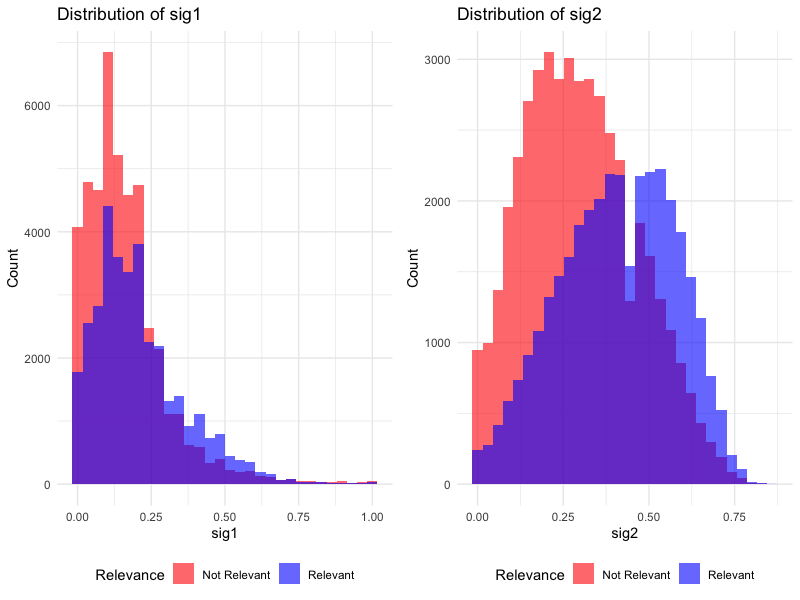

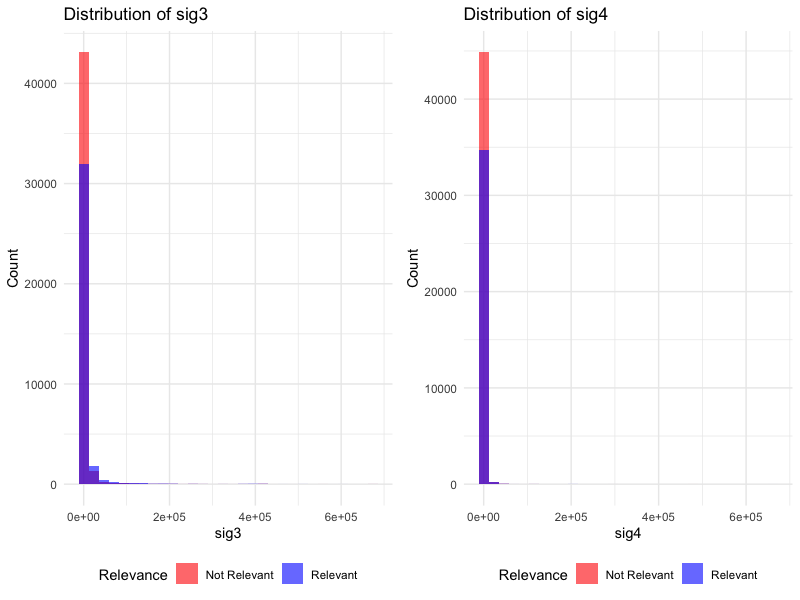

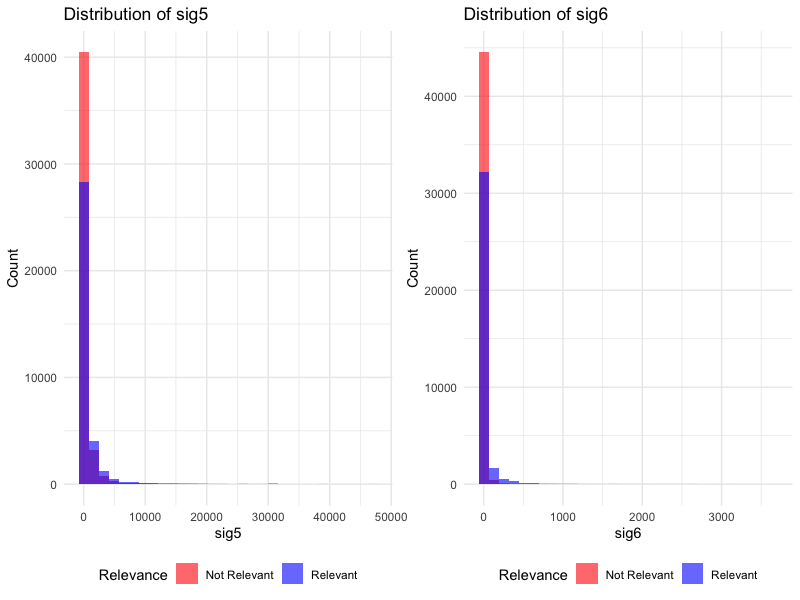

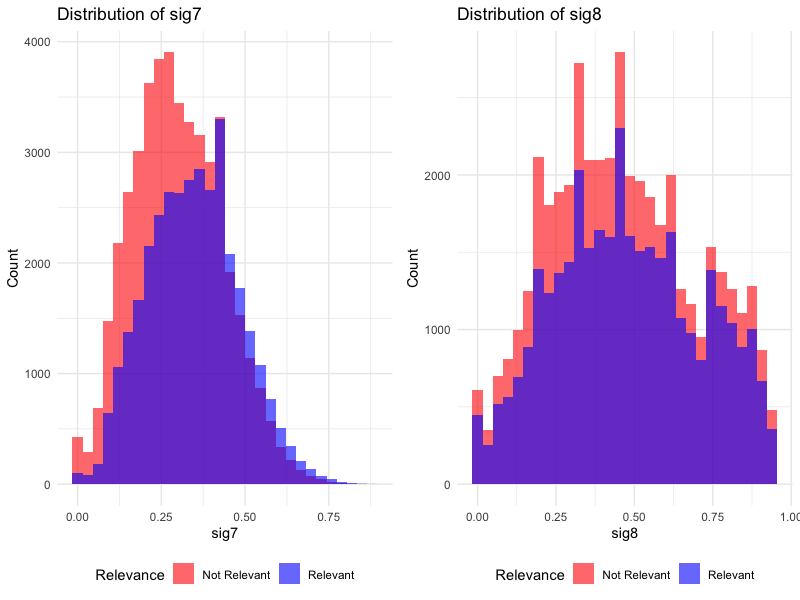

In [5]:
# Load necessary libraries
library(ggplot2)
library(gridExtra)

# Get all numeric columns except query_id, url_id, relevance, and id
feature_cols <- names(train)[!names(train) %in% c("query_id", "url_id", "relevance", "id")]

# Create a list to store plots
plots <- list()

# Create histograms for each feature
for (col in feature_cols) {
  p <- ggplot(train, aes_string(x = col, fill = "factor(relevance)")) +
    geom_histogram(alpha = 0.6, position = "identity", bins = 30) +
    scale_fill_manual(values = c("0" = "red", "1" = "blue"),
                      labels = c("0" = "Not Relevant", "1" = "Relevant")) +
    labs(title = paste("Distribution of", col),
         x = col,
         y = "Count",
         fill = "Relevance") +
    theme_minimal() +
    theme(legend.position = "bottom")
  
  plots[[col]] <- p
}

# Display plots in a grid (2 columns)
for (i in seq(1, length(plots), 2)) {
  if (i < length(plots)) {
    grid.arrange(plots[[i]], plots[[i+1]], ncol = 2)
  } else {
    print(plots[[i]])
  }
}

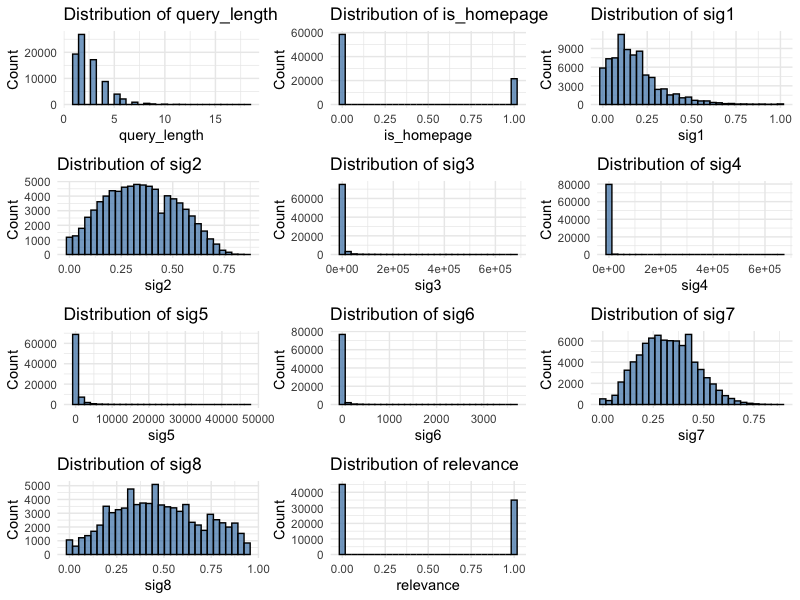

In [6]:
#| fig-width: 12
#| fig-height: 10

#| message: false
#| warning: false

# Get all numeric columns except query_id, url_id, and id
feature_cols <- names(train)[!names(train) %in% c("query_id", "url_id", "id")]

# Create a list to store plots
plots <- list()

# Create simple histograms for each feature
for (col in feature_cols) {
  p <- ggplot(train, aes(x = .data[[col]])) +
    geom_histogram(bins = 30, fill = "steelblue", color = "black", alpha = 0.7) +
    labs(title = paste("Distribution of", col),
         x = col,
         y = "Count") +
    theme_minimal()
  
  plots[[col]] <- p
}

# Display plots in a grid (3 columns)
grid.arrange(grobs = plots, ncol = 3)